<a href="https://colab.research.google.com/github/Gopikasri14/COMPUTER-VISION/blob/main/image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving img2.jpg to img2.jpg


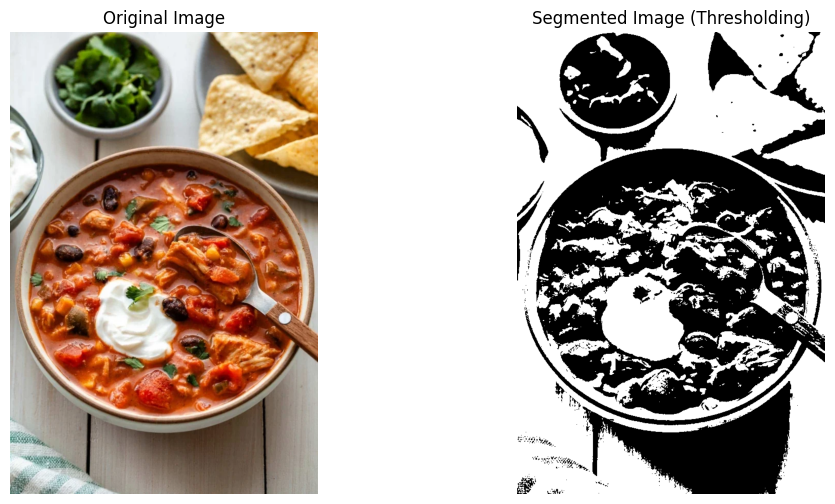

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def threshold_segmentation(image, threshold_value=127):
    if len(image.shape) == 3:
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        grayscale_image = image
    _, segmented_image = cv2.threshold(grayscale_image, threshold_value, 255, cv2.THRESH_BINARY)
    return segmented_image

def show_segmented_image(original_image, segmented_image):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image, cmap='gray')
    plt.title('Segmented Image (Thresholding)')
    plt.axis('off')
    plt.show()

# Provide the correct path to your image file
image_path = 'img2.jpg'  # Update this to your image's full path
image = cv2.imread(image_path)

if image is None:
    print(f"Image not found at path: {image_path}")
    exit()

threshold_value = 127  # You can adjust this value for better segmentation
segmented_image = threshold_segmentation(image, threshold_value)
show_segmented_image(image, segmented_image)


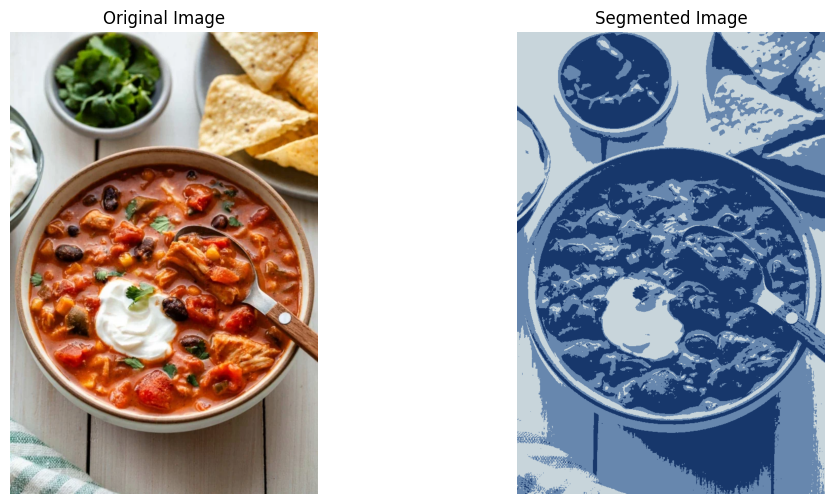

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# K-means segmentation function
def kmeans_segmentation(image, k=7, attempts=10):
    # Reshaping the image to a 2D array of pixels (each pixel has 3 values: RGB)
    pixels = image.reshape((-1, 3)).astype(np.float32)

    # Define the stopping criteria for K-means (either when accuracy or max iterations is reached)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    # Apply K-means clustering to segment the image
    ret, labels, centers = cv2.kmeans(pixels, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

    # Convert centers (mean colors) to uint8 (0-255)
    centers = np.uint8(centers)

    # Reconstruct the segmented image
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)

    return segmented_image, labels

# Function to display the original and segmented images
def show_segmented_image(original_image, segmented_image):
    plt.figure(figsize=(12, 6))

    # Display the original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    # Display the segmented image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Image')
    plt.axis('off')

    plt.show()

# Load the image (provide the correct path to your image)
image_path = 'img2.jpg'  # Update this path

image = cv2.imread(image_path)
if image is None:
    print("Image not found")
    exit()

# Convert image to RGB for matplotlib compatibility
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply K-means segmentation
segmented_image, labels = kmeans_segmentation(image_rgb, k=3)

# Display the original and segmented images
show_segmented_image(image_rgb, segmented_image)


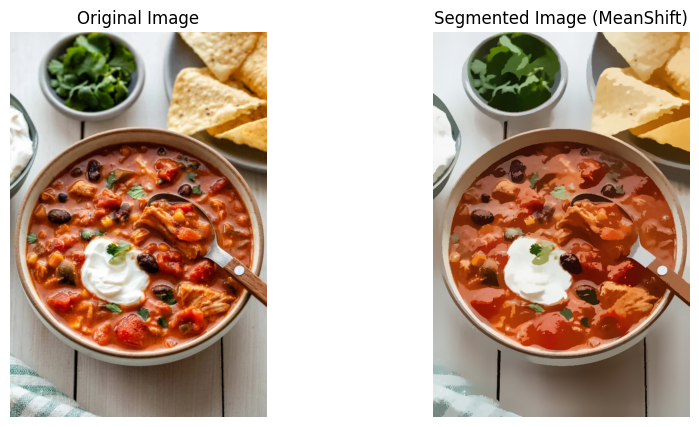

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (provide the correct path to your image)
image_path = 'img2.jpg'  # Update this to the correct path of your image
image = cv2.imread(image_path)

if image is None:
    print("Image not found")
    exit()

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply PyrMeanShiftFiltering for segmentation
segmented_image = cv2.pyrMeanShiftFiltering(image, sp=21, sr=51, maxLevel=1)

# Convert the segmented image from BGR to RGB
segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

# Plot the original and segmented images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

# Segmented Image (after MeanShift filtering)
plt.subplot(1, 2, 2)
plt.title('Segmented Image (MeanShift)')
plt.imshow(segmented_image_rgb)
plt.axis('off')

# Show the plot
plt.show()


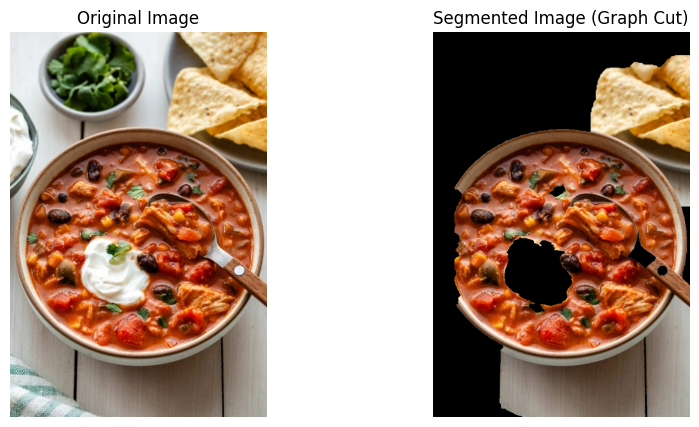

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (provide the correct path to your image)
image_path = 'img2.jpg'  # Update this to the correct path of your image
image = cv2.imread(image_path)

if image is None:
    print("Image not found")
    exit()

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a mask for GrabCut
mask = np.zeros(image.shape[:2], np.uint8)

# Background and foreground models (used by GrabCut)
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Define the rectangle that covers the foreground object
rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)

# Apply GrabCut algorithm
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask to obtain a binary mask
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to the image to segment it
segmented_image = image * mask2[:, :, np.newaxis]

# Convert the segmented image from BGR to RGB for displaying with matplotlib
segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

# Plot the original and segmented images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

# Segmented Image (after GrabCut)
plt.subplot(1, 2, 2)
plt.title('Segmented Image (Graph Cut)')
plt.imshow(segmented_image_rgb)
plt.axis('off')

# Show the plot
plt.show()

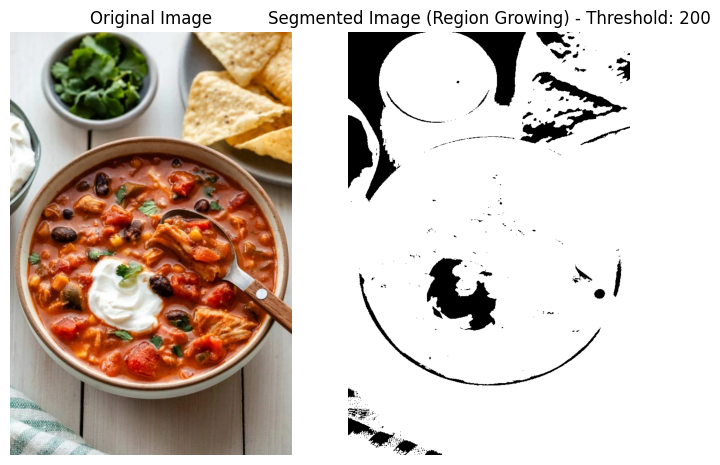

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def region_growing(image, seed, threshold=30):
    # Convert the image to grayscale if it is in color (BGR)
    if len(image.shape) == 3:
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image.copy()

    # Initialize the segmented image with zeros
    segmented_image = np.zeros_like(image_gray, dtype=np.uint8)

    # Stack to keep track of pixels to check
    stack = [seed]
    seed_intensity = image_gray[seed]  # Intensity of the seed pixel

    # Neighbors (4-connectivity: up, down, left, right)
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    # Perform region growing
    while stack:
        x, y = stack.pop()

        # Skip if the pixel has already been segmented
        if segmented_image[x, y] == 255:
            continue

        # Mark the pixel as part of the segmented region
        segmented_image[x, y] = 255

        # Check all 4-connected neighbors
        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy

            # Ensure the neighbor is within image bounds
            if 0 <= nx < image_gray.shape[0] and 0 <= ny < image_gray.shape[1]:
                # If the neighbor pixel is not segmented and its intensity difference
                # from the seed intensity is less than the threshold, add it to the stack
                if segmented_image[nx, ny] == 0 and abs(int(image_gray[nx, ny]) - int(seed_intensity)) < threshold:
                    stack.append((nx, ny))

    return segmented_image

# Load the image (provide the correct path to your image)
image_path = 'img2.jpg'  # Make sure this path is correct
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print("Image not found")
    exit()

# Define the seed point for region growing (you can adjust this point)
seed_point = (100, 100)

# Adjust the threshold size (you can change this value to test different segmentations)
threshold_value = 200  # Increase or decrease this value to change the segmentation's strictness

# Perform region growing segmentation
segmented_image = region_growing(image, seed_point, threshold=threshold_value)

# Plot the original and segmented images
plt.figure(figsize=(8, 8))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Segmented Image
plt.subplot(1, 2, 2)
plt.title(f"Segmented Image (Region Growing) - Threshold: {threshold_value}")
plt.imshow(segmented_image, cmap='gray')
plt.axis("off")

# Show the plot
plt.show()
